# Setting up BrainEncoderWrapper

To run the ensemble model, you need at least one model trained for each hemisphere. The expected directory structure for `checkpoints/nsd_test/dinov2_q_transformer/subj_{subj_num:02}/enc_{enc_layer}/run_{run_num}/{hemi}`. The wrapper will search for models checkpoints in the encoder output layers and runs specified below. Any model that is not found will be skipped.

In [1]:
repo_dir = "/engram/nklab/hossein/recurrent_models/whole_brain_encoder/"

import sys
sys.path.append(repo_dir)

import os
os.chdir(repo_dir)

import torch
import numpy as np
from brain_encoder_wrapper import BrainEncoderWrapper
from datasets.nsd import nsd_dataset_avg
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

subj = 1
model = BrainEncoderWrapper(
    subj=subj, enc_output_layer=[1, 3, 5, 7], runs=[1]
)

/home/ha2366/.conda/envs/diff/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 4 valid models for lh
Found 4 valid models for rh
max lh corr 0.10350669220398642 min 0.09443065281876467
max rh corr 0.10973840364053082 min 0.09779186928302257


# Loading a sample image

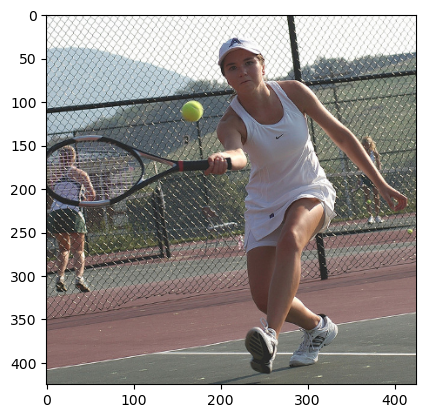

In [2]:
img_path = Path(
    "/engram/nklab/algonauts/algonauts_2023_challenge_data/subj01/training_split/training_images/train-9039_nsd-66847.png"
)
img = Image.open(img_path)
plt.imshow(img)
plt.show()

# Run inference to predict neural data for the sample image

In [3]:
img = np.array(img)

out = model.forward(img[None, ...])

Running inference on lh models:   0%|          | 0/4 [00:00<?, ?it/s]

Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
xFormers not available
xFormers not available
Running inference on lh models:  25%|██▌       | 1/4 [00:04<00:12,  4.15s/it]

Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.5432
Test: Total time: 0:00:00 (0.5843 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)
Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
Running inference on lh models:  50%|█████     | 2/4 [00:06<00:06,  3.29s/it]

Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.1187
Test: Total time: 0:00:00 (0.1498 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)
Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
Running inference on lh models:  75%|███████▌  | 3/4 [00:09<00:03,  3.02s/it]

Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.1243
Test: Total time: 0:00:00 (0.1662 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)
Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
Running inference on lh models: 100%|██████████| 4/4 [00:12<00:00,  3.06s/it]


Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.1228
Test: Total time: 0:00:00 (0.1547 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on rh models:   0%|          | 0/4 [00:00<?, ?it/s]

Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
Running inference on rh models:  25%|██▌       | 1/4 [00:02<00:08,  2.71s/it]

Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.1202
Test: Total time: 0:00:00 (0.1508 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)
Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
Running inference on rh models:  50%|█████     | 2/4 [00:05<00:05,  2.69s/it]

Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.1189
Test: Total time: 0:00:00 (0.1494 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)
Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
Running inference on rh models:  75%|███████▌  | 3/4 [00:08<00:02,  2.70s/it]

Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.1184
Test: Total time: 0:00:00 (0.1488 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)
Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main
Running inference on rh models: 100%|██████████| 4/4 [00:11<00:00,  2.79s/it]

Test:  [0/1]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.5029
Test: Total time: 0:00:00 (0.5350 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


The expected result is has shape [num_images, num_voxels].

In [4]:
out['lh'].shape, out['rh'].shape

(torch.Size([1, 163842]), torch.Size([1, 163842]))

# Running inference on the NSD test split

In [5]:
from utils.args import get_default_args

args = get_default_args()
val_dataset = nsd_dataset_avg(args, transform=None, split="test")
imgs_data = []
for img, _ in val_dataset:
    imgs_data.append(img)
imgs_data = np.stack(imgs_data)
print(imgs_data.shape)

out = model.forward(imgs_data)

Number of parcels:  498
(515, 425, 425, 3)


Running inference on lh models:   0%|          | 0/4 [00:00<?, ?it/s]

Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:24  loss_labels: 0.0000 (0.0000)  time: 0.7296
Test:  [10/33]  eta: 0:00:08  loss_labels: 0.0000 (0.0000)  time: 0.3586
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3157
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3094
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.2971
Test: Total time: 0:00:10 (0.3215 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on lh models:  25%|██▌       | 1/4 [00:13<00:40, 13.55s/it]

Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:20  loss_labels: 0.0000 (0.0000)  time: 0.6325
Test:  [10/33]  eta: 0:00:07  loss_labels: 0.0000 (0.0000)  time: 0.3477
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3149
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3140
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3014
Test: Total time: 0:00:10 (0.3207 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on lh models:  50%|█████     | 2/4 [00:26<00:26, 13.37s/it]

Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:21  loss_labels: 0.0000 (0.0000)  time: 0.6512
Test:  [10/33]  eta: 0:00:07  loss_labels: 0.0000 (0.0000)  time: 0.3466
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3134
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3106
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.2978
Test: Total time: 0:00:10 (0.3185 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on lh models:  75%|███████▌  | 3/4 [00:40<00:13, 13.50s/it]

Number of parcels:  498


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:23  loss_labels: 0.0000 (0.0000)  time: 0.7055
Test:  [10/33]  eta: 0:00:08  loss_labels: 0.0000 (0.0000)  time: 0.3494
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3131
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3121
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.2995
Test: Total time: 0:00:10 (0.3204 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on rh models:   0%|          | 0/4 [00:00<?, ?it/s]

Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:20  loss_labels: 0.0000 (0.0000)  time: 0.6161
Test:  [10/33]  eta: 0:00:07  loss_labels: 0.0000 (0.0000)  time: 0.3389
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3137
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3130
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3004
Test: Total time: 0:00:10 (0.3175 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on rh models:  25%|██▌       | 1/4 [00:13<00:39, 13.14s/it]

Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:20  loss_labels: 0.0000 (0.0000)  time: 0.6102
Test:  [10/33]  eta: 0:00:07  loss_labels: 0.0000 (0.0000)  time: 0.3385
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3106
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3103
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3011
Test: Total time: 0:00:10 (0.3179 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on rh models:  50%|█████     | 2/4 [00:26<00:26, 13.14s/it]

Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:20  loss_labels: 0.0000 (0.0000)  time: 0.6205
Test:  [10/33]  eta: 0:00:07  loss_labels: 0.0000 (0.0000)  time: 0.3404
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3150
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3170
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3043
Test: Total time: 0:00:10 (0.3201 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on rh models:  75%|███████▌  | 3/4 [00:39<00:13, 13.17s/it]

Number of parcels:  490


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Test:  [ 0/33]  eta: 0:00:20  loss_labels: 0.0000 (0.0000)  time: 0.6188
Test:  [10/33]  eta: 0:00:07  loss_labels: 0.0000 (0.0000)  time: 0.3462
Test:  [20/33]  eta: 0:00:04  loss_labels: 0.0000 (0.0000)  time: 0.3151
Test:  [30/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.3112
Test:  [32/33]  eta: 0:00:00  loss_labels: 0.0000 (0.0000)  time: 0.2990
Test: Total time: 0:00:10 (0.3189 s / it)
Averaged stats: loss_labels: 0.0000 (0.0000)


Running inference on rh models: 100%|██████████| 4/4 [00:52<00:00, 13.17s/it]


In [6]:
out['lh'].shape

torch.Size([515, 163842])

# Calculate the correlation between the prediction and ground truth

In [7]:
from scipy.stats import pearsonr as corr
from tqdm import tqdm
from pathlib import Path

# save_dir = (
#     Path(model.results_dir)
#     / f"subj_{1:02}"
#     / f"enc_{'_'.join([str(s) for s in model.enc_output_layer])}_run_{'_'.join([str(s) for s in model.runs])}"
# )

split = "test"
# save_dir.mkdir(exist_ok=True, parents=True)
val_correlation = {}
for hemi in ["lh", "rh"]:
    args.metaparcel_idx = 0
    args.hemi = hemi
    val_dataset = nsd_dataset_avg(args, transform=None, split=split)

    data_idxs = [val_dataset.img_to_runs[i] for i in range(len(val_dataset))]
    data = [
        torch.from_numpy(val_dataset.betas[idxs]).mean(axis=0) for idxs in data_idxs
    ]
    ys = torch.stack(data)

    num_valid_voxels = ys.shape[1]
    val_correlation[hemi] = torch.zeros(num_valid_voxels)
    for v in tqdm(
        range(num_valid_voxels),
        desc="Calculating voxel-wise validation correlations",
        leave=False,
    ):
        val_correlation[hemi][v] = corr(ys[:, v].cpu(), out[hemi][:, v].cpu())[0]

    val_correlation[hemi] = val_correlation[hemi].numpy()

    print(f"Validation correlation for {hemi} hemi: {val_correlation[hemi].mean()}")

val_correlation = {k: v for k, v in val_correlation.items()}


Number of parcels:  498


Validation correlation for lh hemi: 0.18252618610858917
Number of parcels:  490


Validation correlation for rh hemi: 0.19709493219852448
